In [2]:
#!pip install scikit-learn


In [3]:
# importar pandas numpy sklearn
import pandas as pd
import numpy as np

In [4]:
link_database = ' http://brl.bcm.tmc.edu/rme/gbm.dat'

# Descarga el archivo de la base de datos
import urllib.request
urllib.request.urlretrieve(link_database, 'gbm.dat')

('gbm.dat', <http.client.HTTPMessage at 0x1ae7b2b0750>)

In [5]:
# Lee el archivo con pandas
data = pd.read_csv('gbm.dat', sep='\t')
columns = data.columns
data.describe()

,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,TCGA-02-0016,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,0.012915,0.044280,0.012915,0.083026,0.018450,0.127306,0.014760,0.062731,0.081181,0.068266,...,0.011070,0.036900,0.020295,0.007380,0.029520,0.020295,0.009225,0.018450,0.011070,0.014760
std,0.113013,0.205908,0.113013,0.276176,0.134697,0.333624,0.120703,0.242702,0.273365,0.252434,...,0.104727,0.188691,0.141138,0.085669,0.169416,0.141138,0.095692,0.134697,0.104727,0.120703
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.head()


,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data


,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0373,TCGA-08-0375,TCGA-08-0380,TCGA-08-0386,TCGA-08-0389,TCGA-08-0390,TCGA-12-0616,TCGA-12-0618,TCGA-12-0619,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,DLL3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,DOCK8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,chr6:166018727-166026434,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
540,DST,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
filtered_data = data.loc[:, (data != 0).sum() > 6]
filtered_data

,Unnamed: 0,TCGA-02-0001,TCGA-02-0003,TCGA-02-0006,TCGA-02-0007,TCGA-02-0009,TCGA-02-0010,TCGA-02-0011,TCGA-02-0014,TCGA-02-0015,...,TCGA-08-0356,TCGA-08-0357,TCGA-08-0358,TCGA-08-0359,TCGA-08-0375,TCGA-08-0380,TCGA-08-0389,TCGA-08-0390,TCGA-12-0618,TCGA-12-0620
0,ZNF708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,XPOT,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,RNF38,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CCT2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,INSR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,DLL3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,DOCK8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
539,chr6:166018727-166026434,0,1,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,0
540,DST,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Diferencia entre los datos originales y los datos filtrados
print(data.shape)
print(filtered_data.shape)

(542, 146)
(542, 113)


In [10]:
# Calculate the exclusivity score between each pair of genes, defined as the number of samples where exactly one of the pair is mutated divided by the number of samples where at least one of the pair is mutated.

# Diccionario sample -> genes mutados
sample_genes = {}

num_exclusive_samples = 0
num_samples = 0

# Recorre las muestras y muestra los genes que estan mutados
for index, row in filtered_data.iterrows():
    num_samples = len(row[row != 0])
    sample_genes[index] = row[row != 0]
    #gen = row[0], sample = row[1:]
    #print(sample_genes[index])
    print('Mutated gene:', row[row != 0]['Unnamed: 0'])
    print("Samples with at least one mutation:", num_samples)
    if num_samples == 1:
        num_exclusive_samples += 1

Mutated gene: ZNF708
Samples with at least one mutation: 7
Mutated gene: XPOT
Samples with at least one mutation: 2
Mutated gene: RNF38
Samples with at least one mutation: 2
Mutated gene: CCT2
Samples with at least one mutation: 2
Mutated gene: INSR
Samples with at least one mutation: 1
Mutated gene: ESR2
Samples with at least one mutation: 2
Mutated gene: ATP1A2
Samples with at least one mutation: 2
Mutated gene: DGKD
Samples with at least one mutation: 2
Mutated gene: chr6:168107192-168276703
Samples with at least one mutation: 16
Mutated gene: GYPA
Samples with at least one mutation: 3
Mutated gene: MN1
Samples with at least one mutation: 12
Mutated gene: RADIL
Samples with at least one mutation: 3
Mutated gene: TRIM24
Samples with at least one mutation: 2
Mutated gene: GYPB
Samples with at least one mutation: 2
Mutated gene: PHIP
Samples with at least one mutation: 2
Mutated gene: chr6:164016427-164050128
Samples with at least one mutation: 22
Mutated gene: USF1
Samples with at lea

In [11]:
for sample, genes in sample_genes.items():
    print('Gene:', genes['Unnamed: 0'])
    print(sample_genes[sample])

Gene: ZNF708
Unnamed: 0      ZNF708
TCGA-02-0055         1
TCGA-06-0143         1
TCGA-06-0159         1
TCGA-06-0169         1
TCGA-06-0173         1
TCGA-06-0190         1
Name: 0, dtype: object
Gene: XPOT
Unnamed: 0      XPOT
TCGA-06-0176       1
Name: 1, dtype: object
Gene: RNF38
Unnamed: 0      RNF38
TCGA-06-0138        1
Name: 2, dtype: object
Gene: CCT2
Unnamed: 0      CCT2
TCGA-02-0099       1
Name: 3, dtype: object
Gene: INSR
Unnamed: 0    INSR
Name: 4, dtype: object
Gene: ESR2
Unnamed: 0      ESR2
TCGA-02-0011       1
Name: 5, dtype: object
Gene: ATP1A2
Unnamed: 0      ATP1A2
TCGA-02-0083         1
Name: 6, dtype: object
Gene: DGKD
Unnamed: 0      DGKD
TCGA-02-0114       1
Name: 7, dtype: object
Gene: chr6:168107192-168276703
Unnamed: 0      chr6:168107192-168276703
TCGA-02-0003                           1
TCGA-02-0007                           1
TCGA-02-0015                           1
TCGA-02-0027                           1
TCGA-02-0058                           1
TCGA-02-

In [12]:
# number of samples where at least one of the pair is mutated
num_samples = len(sample_genes)
print('Number of samples:', num_samples)

# number of samples where exactly one of the pair is mutated
print('Number of exclusive samples:', num_exclusive_samples)

Number of samples: 542
Number of exclusive samples: 17


In [13]:
# Calculate the exclusivity score between each pair of genes
exclusivity_scores = np.zeros((len(filtered_data.columns), len(filtered_data.columns)))
for i, gene1 in enumerate(filtered_data.columns):
    for j, gene2 in enumerate(filtered_data.columns):
        print('Gene 1:', gene1)
        if i == j:
            continue
        num_samples_where_both_mutated = 0
        num_samples_where_one_mutated = 0
        for sample, genes in sample_genes.items():
            if gene1 in genes and gene2 in genes:
                num_samples_where_both_mutated += 1
            if gene1 in genes or gene2 in genes:
                num_samples_where_one_mutated += 1
        exclusivity_scores[i, j] = num_samples_where_both_mutated / num_samples_where_one_mutated

Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unnamed: 0
Gene 1: Unna

In [14]:
exclusivity_scores

array([[0.        , 0.01291513, 0.04428044, ..., 0.0202952 , 0.01845018,
        0.01476015],
       [0.01291513, 0.        , 0.10714286, ..., 0.125     , 0.30769231,
        0.25      ],
       [0.04428044, 0.10714286, 0.        , ..., 0.12903226, 0.21428571,
        0.03225806],
       ...,
       [0.0202952 , 0.125     , 0.12903226, ..., 0.        , 0.10526316,
        0.05555556],
       [0.01845018, 0.30769231, 0.21428571, ..., 0.10526316, 0.        ,
        0.2       ],
       [0.01476015, 0.25      , 0.03225806, ..., 0.05555556, 0.2       ,
        0.        ]])

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

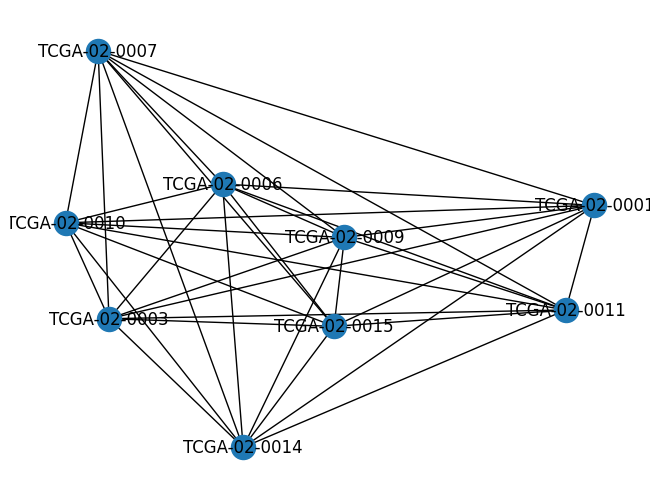

In [16]:
# These data could be used to create a network where each node is a gene and each edge weight is the exclusivity between the genes.
#The highly connected sub-networks would then be used as a starting point for a focused combinatorial search for modules. The disadvantage of this approach is that the networks quickly becomes much too large and densely connected to effectively identify sub-network

def network_from_exclusivity_scores(exclusivity_scores, genes):
    G = nx.Graph()
    for i, gene1 in enumerate(genes):
        for j, gene2 in enumerate(genes):
            if i == j:
                continue
            G.add_edge(gene1, gene2, weight=exclusivity_scores[i, j])

    pos = nx.spring_layout(G)
    nx.draw(G, pos)
    # Labels en los nodos
    nx.draw_networkx_labels(G, pos)
    plt.show()

network_from_exclusivity_scores(exclusivity_scores, filtered_data.columns[1:10])

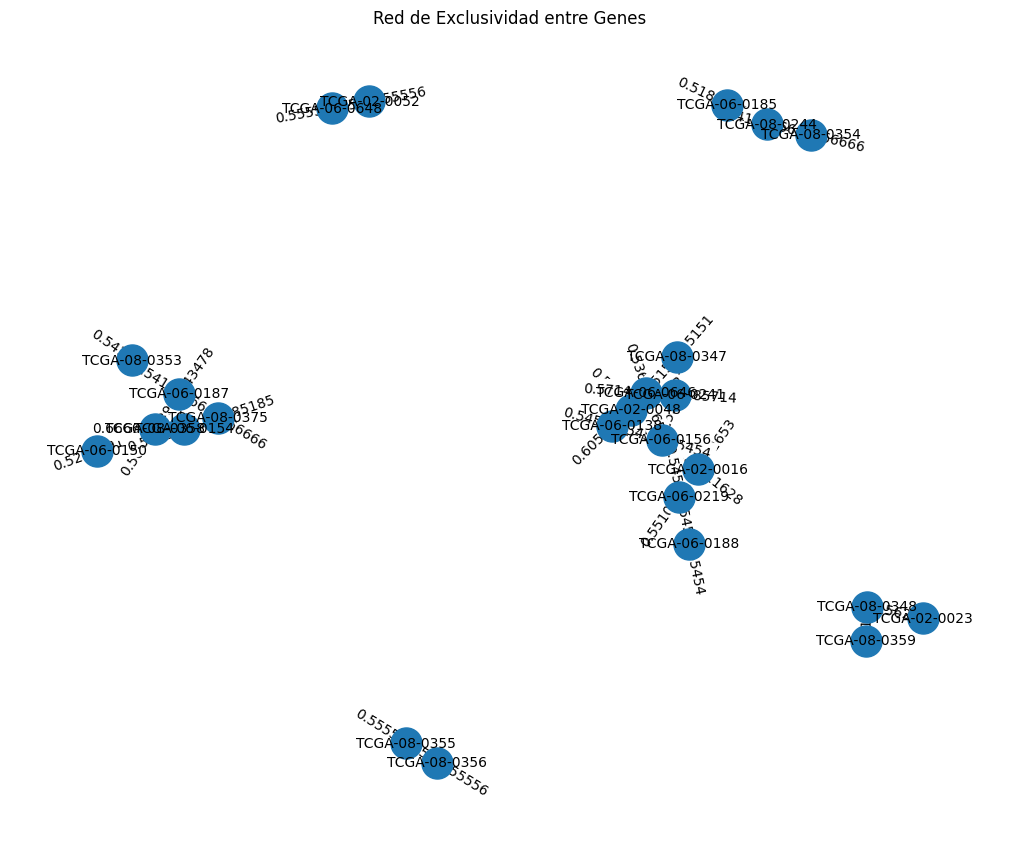

In [17]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Descarga el archivo de la base de datos
url = 'http://brl.bcm.tmc.edu/rme/gbm.dat'
data = pd.read_csv(url, sep='\t')

# Filtra los genes con al menos 7 muestras mutadas
filtered_data = data.loc[:, (data != 0).sum() > 6]

# Calcula los puntajes de exclusividad entre cada par de genes
exclusivity_scores = {}
for gene1 in filtered_data.columns[1:]:
    for gene2 in filtered_data.columns[1:]:
        if gene1 == gene2:
            continue
        num_samples_where_both_mutated = ((filtered_data[gene1] > 0) & (filtered_data[gene2] > 0)).sum()
        num_samples_where_either_mutated = ((filtered_data[gene1] > 0) | (filtered_data[gene2] > 0)).sum()
        if num_samples_where_either_mutated != 0:
            exclusivity_scores[(gene1, gene2)] = num_samples_where_both_mutated / num_samples_where_either_mutated

# Filtra los puntajes de exclusividad para aquellos que superan un umbral
threshold = 0.8
filtered_exclusivity_scores = {pair: score for pair, score in exclusivity_scores.items() if score > threshold}

# Crea un gráfico de red utilizando NetworkX
G = nx.Graph()
for pair, score in filtered_exclusivity_scores.items():
    gene1, gene2 = pair
    G.add_edge(gene1, gene2, weight=score)

# Visualiza la red de exclusividad
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10, font_color='black')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Red de Exclusividad entre Genes')
plt.show()
